In [1]:
# reload modules without reloading explicitly
import importlib
%load_ext autoreload
%autoreload 2

In [7]:
#specify ""matplotlib notebook"" for resizeable inline plots:
# works in jupyter notebook
%matplotlib notebook 
# works in vs code; may need to ""pip install ipympl""
#%matplotlib widget
import os
from pathlib import Path
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import numpy as np
import ipyvolume as ipv
import sklearn.decomposition

In [8]:
p = Path('./renamed')
filegen = p.glob('cam-04*.jpg')
path = next(filegen)
x  = Image.open(path) 
x = np.asarray(ImageOps.grayscale(x))
print(x.shape)

(108, 192)


In [23]:
RES_X = 108
RES_Y = 192
N = 100
filegen = p.glob('cam-04*.jpg')
imagearr = np.zeros((RES_X*RES_Y, N))

for n in range(N):
    filepath = next(filegen)
    x = Image.open(filepath)
    xgray = np.asarray(ImageOps.grayscale(x))
    xraster = np.reshape(xgray, (RES_X * RES_Y, ))
    imagearr[:,n]  = xraster
imagearr = (1.0/N) * imagearr
#
# subtract global dataset mean--dont need to remove mean per column
imagemean = np.mean(imagearr)
imagearr = imagearr - imagemean
print(imagearr.shape)
print(np.mean(imagearr))

(20736, 100)
1.7796463891028435e-16


<IPython.core.display.Javascript object>


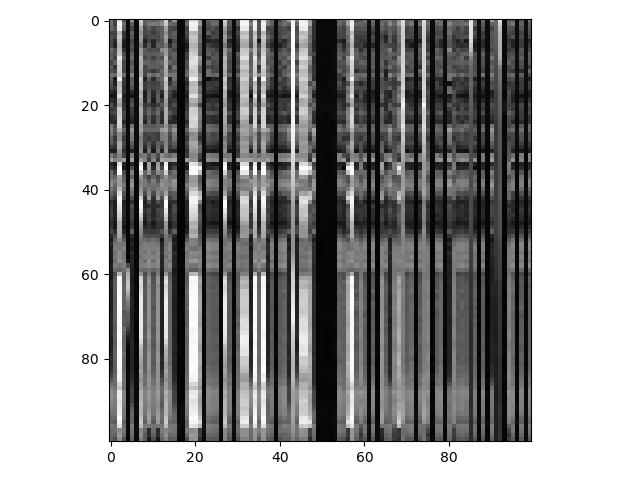

In [11]:
plt.imshow(imagearr[0:100,0:100],cmap='gray')
plt.tight_layout()
plt.show()

In [12]:
#
# eigendecomposition of image sequence
#
U, s, Vt = np.linalg.svd(imagearr,full_matrices=False)


<IPython.core.display.Javascript object>


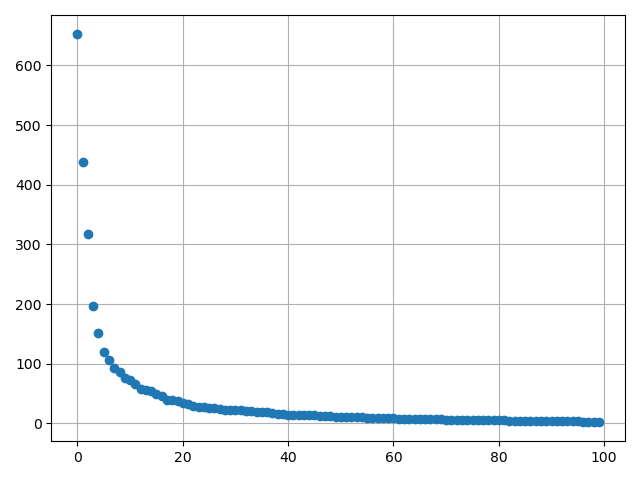

In [13]:
fig,ax=plt.subplots()
ax.plot(s,'o')
plt.tight_layout()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


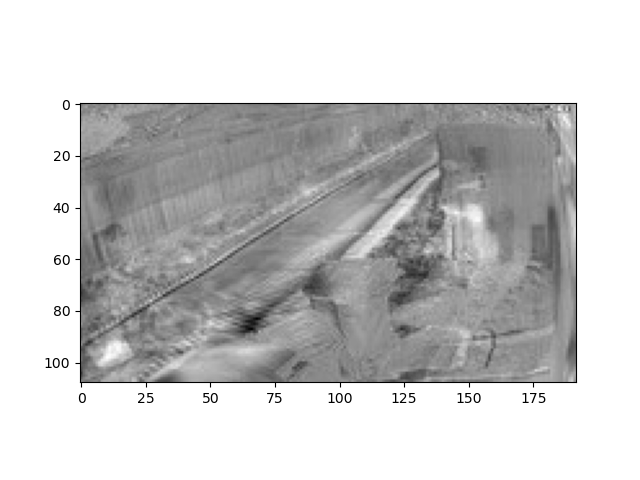

In [20]:
x = np.reshape(U[:,20], (RES_X, RES_Y))
fig,ax=plt.subplots()
ax.imshow(x, cmap='gray')
plt.show()

In [111]:
#
# eigenimage reconstruction
# project eigenvectors onto original image
#
# select a subset of feature vectors
NUM_FEATURE_VECS=1
assert NUM_FEATURE_VECS <= U.shape[1]

Usub = np.zeros(U.shape)
Usub[:,0:NUM_FEATURE_VECS] = U[:,0:NUM_FEATURE_VECS]

print(Usub.shape)



(20736, 100)


<IPython.core.display.Javascript object>


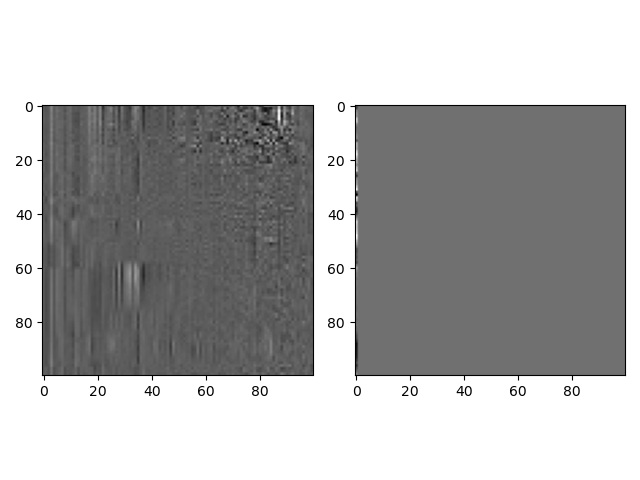

In [112]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(U[0:100,:],cmap='gray')
ax[1].imshow(Usub[0:100,:],cmap='gray')
plt.tight_layout()
plt.show()

In [113]:
Y = np.matmul(Usub.transpose(), imagearr)
Y.shape

(100, 100)

In [114]:
imagearr_hat = np.matmul(Usub, Y)
imagearr_hat.shape

(20736, 100)

<IPython.core.display.Javascript object>


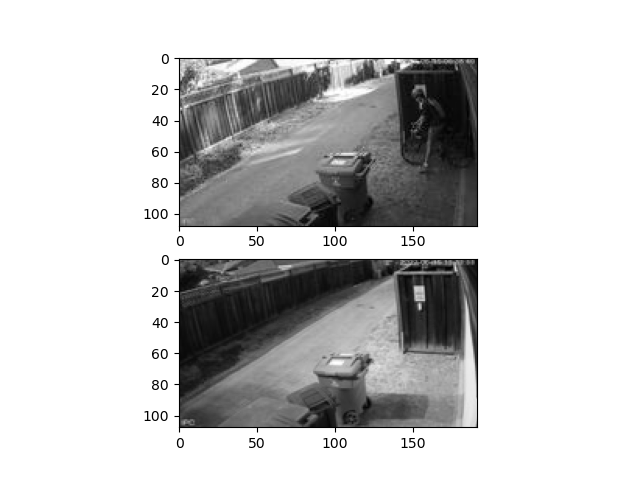

In [116]:
IMAGE_INDEX=2
x = imagearr[:,IMAGE_INDEX]
x = np.reshape(x, (RES_X, RES_Y))
xhat = imagearr_hat[:,IMAGE_INDEX]
xhat = np.reshape(xhat, (RES_X, RES_Y))

fig,ax=plt.subplots(2,1)
ax[0].imshow(x, cmap='gray')
ax[1].imshow(xhat, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


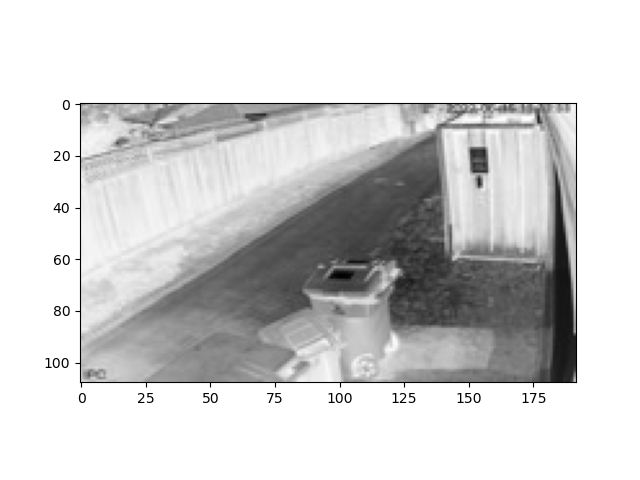

In [117]:
x = np.reshape(U[:,0], (RES_X, RES_Y))
fig,ax=plt.subplots()
ax.imshow(x, cmap='gray')
plt.show()